In [1]:
import graphlab

In [2]:
sf = graphlab.SFrame("./Downloads/people-example.csv")

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1469437035.log


This non-commercial license of GraphLab Create for academic use is assigned to vampire1987116hm@yahoo.com and will expire on July 25, 2017.


Finished parsing file /Users/AkiraKaneshiro/Downloads/people-example.csv

Parsing completed. Parsed 7 lines in 0.067332 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/AkiraKaneshiro/Downloads/people-example.csv

Parsing completed. Parsed 7 lines in 0.014051 secs.

In [4]:
sf # we can view first few lines of table

First Name,Last Name,Country,age
Bob,Smith,United States,24
Alice,Williams,Canada,23
Malcolm,Jone,England,22
Felix,Brown,USA,23
Alex,Cooper,Poland,23
Tod,Campbell,United States,22
Derek,Ward,Switzerland,25


In [5]:
sf.head()

First Name,Last Name,Country,age
Bob,Smith,United States,24
Alice,Williams,Canada,23
Malcolm,Jone,England,22
Felix,Brown,USA,23
Alex,Cooper,Poland,23
Tod,Campbell,United States,22
Derek,Ward,Switzerland,25


In [6]:
sf.tail()

First Name,Last Name,Country,age
Bob,Smith,United States,24
Alice,Williams,Canada,23
Malcolm,Jone,England,22
Felix,Brown,USA,23
Alex,Cooper,Poland,23
Tod,Campbell,United States,22
Derek,Ward,Switzerland,25


## GraphLab Canvas

In [7]:
# Take any data structure in GraphLab Create
sf.show()

Canvas is accessible via web browser at the URL: http://localhost:54457/index.html
Opening Canvas in default web browser.


In [8]:
graphlab.canvas.set_target("ipynb")

In [10]:
sf["age"].show(view="Categorical")

## Inspect columns dataset

In [12]:
sf["Country"]

dtype: str
Rows: 7
['United States', 'Canada', 'England', 'USA', 'Poland', 'United States', 'Switzerland']

In [13]:
sf["age"]

dtype: int
Rows: 7
[24, 23, 22, 23, 23, 22, 25]

In [15]:
sf["age"].mean()

23.142857142857146

In [16]:
sf["age"].max()

25

## Create new columns in our SFrames

In [19]:
sf["Full Name"] = sf["First Name"] + " " + sf["Last Name"]
sf

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,24,Bob Smith
Alice,Williams,Canada,23,Alice Williams
Malcolm,Jone,England,22,Malcolm Jone
Felix,Brown,USA,23,Felix Brown
Alex,Cooper,Poland,23,Alex Cooper
Tod,Campbell,United States,22,Tod Campbell
Derek,Ward,Switzerland,25,Derek Ward


In [20]:
sf["age"] + 2 

dtype: int
Rows: 7
[26, 25, 24, 25, 25, 24, 27]

In [21]:
sf["age"] * sf["age"]

dtype: int
Rows: 7
[576, 529, 484, 529, 529, 484, 625]

## Use apply function for advanced transformation

In [22]:
sf["Country"]

dtype: str
Rows: 7
['United States', 'Canada', 'England', 'USA', 'Poland', 'United States', 'Switzerland']

In [23]:
sf["Country"].show()

In [24]:
def transform_country(country):
    if country == "USA":
        return "United States"
    else:
        return country

In [27]:
sf["Country"] = sf["Country"].apply(transform_country)
sf

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,24,Bob Smith
Alice,Williams,Canada,23,Alice Williams
Malcolm,Jone,England,22,Malcolm Jone
Felix,Brown,United States,23,Felix Brown
Alex,Cooper,Poland,23,Alex Cooper
Tod,Campbell,United States,22,Tod Campbell
Derek,Ward,Switzerland,25,Derek Ward


## Predicting House prices

In [31]:
import graphlab

In [32]:
sales = graphlab.SFrame("./Downloads/home_data.gl")

In [33]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [34]:
graphlab.canvas.set_target("ipynb")
sales.show(view="Scatter Plot", x = "sqft_living", y="price")

In [35]:
training_data, test_data = sales.random_split(0.8, seed=0)

In [36]:
sqft_model = graphlab.linear_regression.create(training_data, target="price", features=["sqft_living"])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16483

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.034194     | 4337793.561725     | 2039689.258301       | 263589.928121 | 250871.395377   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [37]:
print test_data["price"].mean()

543054.042563


In [39]:
print sqft_model.evaluate(test_data)

{'max_error': 4134367.3261287566, 'rmse': 255220.09915236617}


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

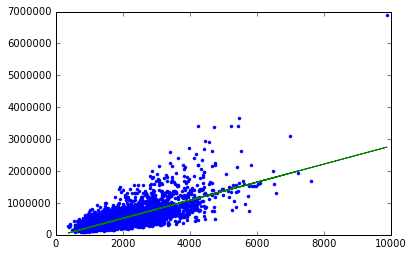

In [41]:
plt.plot(test_data["sqft_living"], test_data["price"], '.',
        test_data["sqft_living"], sqft_model.predict(test_data), '-')

In [42]:
sqft_model.get("coefficients")

name,index,value,stderr
(intercept),None,-49582.3862942,5075.99220466
sqft_living,None,283.136002039,2.23062543605


In [43]:
my_features = ["bedrooms", "bathrooms","sqft_living", "sqft_lot","floors","zipcode"]
sales[my_features].show()

In [44]:
sales.show(view="BoxWhisker Plot", x="zipcode", y="price")

In [48]:
my_features_model = graphlab.linear_regression.create(training_data, target="price", features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16564

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.039045     | 3766131.719380     | 2545634.759096       | 180985.377454 | 210291.415817   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [49]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4134367.3261287566, 'rmse': 255220.09915236617}
{'max_error': 3474021.9351760894, 'rmse': 179458.15173640675}


In [51]:
house1 = sales[sales["id"]=="5309101200"]
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house-5309101200.jpg">

In [53]:
print house1["price"]

[620000, ... ]


In [54]:
print sqft_model.predict(house1)

[629944.0185993543]


In [55]:
print my_features_model.predict(house1)

[721681.0266692068]


In [57]:
house2 = sales[sales["id"]=="1925069082"]
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house-1925069082.jpg">

In [60]:
print house2["price"]
print sqft_model.predict(house2)

[2200000]
[1264168.6631666482]


In [59]:
print my_features_model.predict(house2)

[1471348.0067949805]


In [64]:
sales.show(view="BoxWhisker Plot", x="zipcode", y="price")

In [68]:
sales[sales["zipcode"]=="98039"]["price"].mean()

2160606.5999999996

In [75]:
sales1 = sales[(sales["sqft_living"]>2000) & (sales["sqft_living"]<4000)]
len(sales1) / float(len(sales))

0.4215518437977143

In [76]:
train_data, test_data = sales.random_split(0.8, seed=1)

In [79]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors 
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [80]:
my_model = graphlab.linear_regression.create(train_data, target="price", features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16407

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 130

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.107291     | 2556830.400124     | 1464909.292267       | 150037.863658 | 153840.745117   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [81]:
my_model.evaluate(test_data)

{'max_error': 3653569.2419813266, 'rmse': 163158.38611436778}

## Analyzing product sentiment

In [82]:
import graphlab

In [85]:
products = graphlab.SFrame("./Downloads/amazon_baby.gl")
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [87]:
# Build word count vector for each view
products["word_count"] = graphlab.text_analytics.count_words(products["review"])
products.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5, '6': 1,'stink': 1, 'because' ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'noble': 1,'is': 1, 'it': 1, 'as': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2, 'all': 1,'right': 1, 'when': 1, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ' ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'nanny':1, 'standarad': 1, ..."


In [88]:
graphlab.canvas.set_target("ipynb")

In [90]:
products["name"].show()

In [91]:
giraffe_reviews = products[products["name"] == "Vulli Sophie the Giraffe Teether"]

In [92]:
len(giraffe_reviews)

785

In [93]:
giraffe_reviews["rating"].show(view="Categorical")

In [94]:
# Build a sentiment classifier
products["rating"].show(view = "Categorical")

In [96]:
# Define what a positive and a negative sentiment. ignore all 3* reviews
products = products[products["rating"]!=3]

In [97]:
# Positive sentiment = 4* or 5*
products["sentiment"] = products["rating"] >= 4

In [98]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'noble': 1,'is': 1, 'it': 1, 'as': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2, 'all': 1,'right': 1, 'when': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ' ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'nanny':1, 'standarad': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 1, 'forget': 1,'just': 1, 'food': 1, ...",1


In [99]:
# Let's train the sentiment classifier
train_data, test_data = products.random_split(0.8, seed=0)
sentiment_model = graphlab.logistic_classifier.create(train_data, 
                                                     target = "sentiment",
                                                     features = ["word_count"],
                                                     validation_set = test_data)

WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 219217

Number of coefficients    : 219218

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 5        | 0.000002  | 2.586069     | 0.841481          | 0.839989            |

| 2         | 9        | 3.000000  | 4.583143     | 0.947425          | 0.894877            |

| 3         | 10       | 3.000000  | 5.321454     | 0.923768          | 0.866232            |

| 4         | 11       | 3.000000  | 6.109335     | 0.971779          | 0.912743            |

| 5         | 12       | 3.000000  | 6.880403     | 0.975511          | 0.908900            |

| 6         | 13       | 3.000000  | 7.706458     | 0.899991          | 0.825967            |

| 7         | 15       | 1.000000  | 8.821427     | 0.984548          | 0.921451            |

| 8         | 16       | 1.000000  | 9.636947     | 0.985118          | 0.921871            |

| 9         | 17       | 1.000000  | 10.506711    | 0.987066          | 0.919709            |

| 10        | 18       | 1.000000  | 11.320851    | 0.988715          | 0.916256            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [100]:
# Evaluate the sentiment model
sentiment_model.evaluate(test_data, metric="roc_curve")

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+----------------+----------------+-------+------+
 | threshold |      fpr       |      tpr       |   p   |  n   |
 +-----------+----------------+----------------+-------+------+
 |    0.0    |      1.0       |      1.0       | 27976 | 5328 |
 |   1e-05   | 0.909346846847 | 0.998856162425 | 27976 | 5328 |
 |   2e-05   | 0.896021021021 | 0.998748927652 | 27976 | 5328 |
 |   3e-05   | 0.886448948949 | 0.998462968259 | 27976 | 5328 |
 |   4e-05   | 0.879692192192 | 0.998284243637 | 27976 | 5328 |
 |   5e-05   | 0.875187687688 | 0.998212753789 | 27976 | 5328 |
 |   6e-05   | 0.872184684685 | 0.998177008865 | 27976 | 5328 |
 |   7e-05   | 0.868618618619 | 0.998034029168 | 27976 | 5328 |
 |   8e-05   | 0.864677177177 | 0.997998284244 | 27976 | 5328 |
 |   9e-05   | 0.860735735736 | 0.997962539319 | 27976 | 5328 |
 +-----------+----------------+----------------+-------+------

In [102]:
sentiment_model.show(view="Evaluation")

In [104]:
# applying the learned model to understand sentiment for Giraffe
giraffe_reviews["predicted_sentiment"] = sentiment_model.predict(giraffe_reviews, output_type="probability")
giraffe_reviews

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'and': 1, 'all': 1,'because': 1, 'it': 1, ...",0.999513023521
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'and': 1, 'right': 1,'help': 1, 'just': 1, ...",0.999320678306
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'and': 2, 'all': 1,'would': 1, 'latex.': 1, ...",0.013558811687
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'and': 2, 'one!': 1,'all': 1, 'love': 1, ...",0.995769474148
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'and': 3, 'all': 1,'months': 1, 'old': 1, ...",0.662374415673
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'and': 6, 'seven': 1,'already': 1, 'love': 1, ...",0.999997148186
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'and': 4, 'drooling,':1, 'love': 1, ...",0.989190989536
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'and': 3, 'chew': 1,'be': 1, 'is': 1, ...",0.999563518413
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'chew': 2, 'seemed': 1,'because': 1, 'about.': ...",0.970160542725
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'and': 2, 'already': 1,'some': 1, 'it': 3, ...",0.195367644588


In [108]:
# Sort thr reviews based on the predicted sentiment and explore
giraffe_reviews = giraffe_reviews.sort("predicted_sentiment", ascending=False)
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'giggles': 1, 'all': 1,""violet's"": 2, 'bring': ...",1.0
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'adoring': 1, 'find': 1,'month': 1, 'bright': 1, ...",0.999999999703
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'all': 2, 'discovered':1, 'existence.': 1, ...",0.999999999392
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'all': 2, ""don't"": 1,'(literally).so': 1, ...",0.99999999919
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'cute': 1, 'all': 1,'reviews.': 2, 'just' ...",0.999999998657
Vulli Sophie the GiraffeTeether ...,Sophie the Giraffe is theperfect teething toy. ...,5.0,"{'just': 2, 'both': 1,'month': 1, 'ears,': 1, ...",0.999999997108
Vulli Sophie the GiraffeTeether ...,Sophie la giraffe isabsolutely the best toy ...,5.0,"{'and': 5, 'the': 1,'all': 1, 'that': 2, ...",0.999999995589
Vulli Sophie the GiraffeTeether ...,My 5-mos old son took tothis immediately. The ...,5.0,"{'just': 1, 'shape': 2,'mutt': 1, '""dog': 1, ...",0.999999995573
Vulli Sophie the GiraffeTeether ...,My nephews and my fourkids all had Sophie in ...,5.0,"{'and': 4, 'chew': 1,'all': 1, 'perfect;': 1, ...",0.999999989527
Vulli Sophie the GiraffeTeether ...,Never thought I'd see myson French kissing a ...,5.0,"{'giggles': 1, 'all': 1,'out,': 1, 'over': 1, ...",0.999999985069


In [109]:
giraffe_reviews["review"][0]

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [110]:
giraffe_reviews[1]["review"]

"I'm not sure why Sophie is such a hit with the little ones, but my 7 month old baby girl is one of her adoring fans.  The rubber is softer and more pleasant to handle, and my daughter has enjoyed chewing on her legs and the nubs on her head even before she started teething.  She also loves the squeak that Sophie makes when you squeeze her.  Not sure what it is but if Sophie is amongst a pile of her other toys, my daughter will more often than not reach for Sophie.  And I have the peace of mind of knowing that only edible and safe paints and materials have been used to make Sophie, as opposed to Bright Starts and other baby toys made in China.  Now that the research is out on phthalates and other toxic substances in baby toys, I think it's more important than ever to find good quality toys that are also safe for our babies to handle and put in their mouths.  Sophie is a must-have for every new mom in my opinion.  Even if your kid is one of the few that can take or leave her, it's worth

In [112]:
# Show most nagative reviews
giraffe_reviews[-1]["review"]

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [113]:
giraffe_reviews[-2]["review"]

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [133]:
products = graphlab.SFrame("./Downloads/amazon_baby.gl")
products["word_count"] = graphlab.text_analytics.count_words(products["review"])

In [143]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
def word_count(x):
    dict = {}
    for word in selected_words:
        if word in x:
            dict[word] = x[word]
    return dict

In [144]:
products["word_count1"] = products["word_count"].apply(word_count)

In [145]:
products.head()

name,review,rating,word_count,word_count1,awesome
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5, '6': 1,'stink': 1, 'because' ...",{},0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ...",{'love': 1},0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ...",{},0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ...",{'love': 2},0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ...",{'great': 1},0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ...",{'great': 1},0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'noble': 1,'is': 1, 'it': 1, 'as': ...",{},0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2, 'all': 1,'right': 1, 'when': 1, ...",{},0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ' ...",{},0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'nanny':1, 'standarad': 1, ...",{},0


In [158]:
from functools import partial

def selected_word_count(w,x):
    if w in x:
        return x[w]
    else:
        return 0

for word in selected_words:
    products[word] = products["word_count1"].apply(partial(selected_word_count,word))    

In [159]:
products.head()

name,review,rating,word_count,word_count1,awesome
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5, '6': 1,'stink': 1, 'because' ...",{},0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ...",{'love': 1},0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ...",{},0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ...",{'love': 2},0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ...",{'great': 1},0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ...",{'great': 1},0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'noble': 1,'is': 1, 'it': 1, 'as': ...",{},0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2, 'all': 1,'right': 1, 'when': 1, ...",{},0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ' ...",{},0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'nanny':1, 'standarad': 1, ...",{},0


In [165]:
dict = {}
for word in selected_words:
    word_sum = products[word].sum()
    dict[word] = word_sum

In [182]:
dict

{'amazing': 1363,
 'awesome': 2090,
 'awful': 383,
 'bad': 3724,
 'fantastic': 932,
 'great': 45206,
 'hate': 1220,
 'horrible': 734,
 'love': 42065,
 'terrible': 748,
 'wow': 144}

In [184]:
sorted(dict.items(), key=lambda x: x[1], reverse=True)
#from operator import itemgetter
#sorted(dict.items(), key=itemgetter(1), reverse=True)

[('great', 45206),
 ('love', 42065),
 ('bad', 3724),
 ('awesome', 2090),
 ('amazing', 1363),
 ('hate', 1220),
 ('fantastic', 932),
 ('terrible', 748),
 ('horrible', 734),
 ('awful', 383),
 ('wow', 144)]

In [195]:
train_data, test_data = products.random_split(0.8, seed=0)

In [196]:
products = products[products["rating"] != 3]
products["sentiment"] = products["rating"] >= 4

In [200]:
selected_words_model = graphlab.logistic_classifier.create(train_data, target="sentiment", features=selected_words,
                                                          validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients    : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.311566     | 0.844299          | 0.842842            |

| 2         | 3        | 0.502823     | 0.844186          | 0.842842            |

| 3         | 4        | 0.676338     | 0.844276          | 0.843142            |

| 4         | 5        | 0.836196     | 0.844269          | 0.843142            |

| 5         | 6        | 1.021135     | 0.844269          | 0.843142            |

| 6         | 7        | 1.210431     | 0.844269          | 0.843142            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [202]:
selected_words_model["coefficients"].sort("value", ascending=True)

name,index,class,value,stderr
terrible,None,1,-2.09049998487,0.0967241912229
horrible,None,1,-1.99651800559,0.0973584169028
awful,None,1,-1.76469955631,0.134679803365
hate,None,1,-1.40916406276,0.0771983993506
bad,None,1,-0.985827369929,0.0433603009142
wow,None,1,-0.0541450123333,0.275616449416
great,None,1,0.883937894898,0.0217379527921
fantastic,None,1,0.891303090304,0.154532343591
amazing,None,1,0.892802422508,0.127989503231
awesome,None,1,1.05800888878,0.110865296265


In [203]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8431419649291376,
 'auc': 0.6648096413721418,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  234  |
 |      0       |        1        |  5094 |
 |      1       |        1        | 27846 |
 |      1       |        0        |  130  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.914242563530107,
 'log_loss': 0.4054747110365649,
 'precision': 0.8453551912568306,
 'recall': 0.9953531598513011,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 27976 | 5328 |
 |   1e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   2e-05   | 

In [204]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.916256305548883,
 'auc': 0.9446492867438502,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1328 |
 |      0       |        0        |  4000 |
 |      1       |        1        | 26515 |
 |      1       |        0        |  1461 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9500349343413533,
 'log_loss': 0.2610669843242233,
 'precision': 0.9523039902309378,
 'recall': 0.9477766657134686,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+----------------+----------------+-------+------+
 | threshold |      fpr       |      tpr       |   p   |  n   |
 +-----------+----------------+----------------+-------+------+
 |    0.0    |      1.0       |  

In [212]:
diaper_champ_reviews = products[products["name"]=="Baby Trend Diaper Champ"]

In [219]:
diaper_champ_reviews["predicted_sentiment"] = sentiment_model.predict(diaper_champ_reviews, output_type="probability")
diaper_champ_reviews

name,review,rating,word_count,word_count1,awesome
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'son': 1, 'just': 2,'less': 1, '-': 3, ...",{},0
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'material)': 1, 'bags,':1, 'less': 1, 'when': 3, ...",{},0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'control': 1, 'am': 1,'it': 1, 'used': 1, ' ...",{},0
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'and': 3, 'over.': 1,'all': 1, 'bags.': 1, ...",{'love': 1},0
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'just': 1, '-': 3,'both': 1, 'results': 1, ...",{'horrible': 1},0
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'lysol': 1, 'all': 1,'mom.': 1, 'busy': 1, ...",{'bad': 1},0
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'all': 1, 'bags.': 1,'just': 1, ""don't"": 2, ...",{},0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'lysol': 1, 'all': 2,'bags.': 1, 'feedback': ...",{},0
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'and': 2, 'all': 1,'just': 1, 'is': 2, ' ...",{},0
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'hand.': 1, 'both': 1,'(required': 1, 'befo ...",{'love': 2},0


## Document Retrieval

In [220]:
import graphlab

In [222]:
people = graphlab.SFrame("./Downloads/people_wiki.gl")
people.head()

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


In [223]:
len(people)

59071

In [224]:
obama = people[people["name"] == "Barack Obama"]

In [225]:
obama["text"]

dtype: str
Rows: ?
['barack hussein obama ii brk husen bm born august 4 1961 is the 44th and current president of the united states and the first african american to hold the office born in honolulu hawaii obama is a graduate of columbia university and harvard law school where he served as president of the harvard law review he was a community organizer in chicago before earning his law degree he worked as a civil rights attorney and taught constitutional law at the university of chicago law school from 1992 to 2004 he served three terms representing the 13th district in the illinois senate from 1997 to 2004 running unsuccessfully for the united states house of representatives in 2000in 2004 obama received national attention during his campaign to represent illinois in the united states senate with his victory in the march democratic party primary his keynote address at the democratic national convention in july and his election to the senate in november he began his presidential campa

In [227]:
clooney = people[people["name"] == "George Clooney"]
clooney["text"]

dtype: str
Rows: ?
['george timothy clooney born may 6 1961 is an american actor writer producer director and activist he has received three golden globe awards for his work as an actor and two academy awards one for acting and the other for producingclooney made his acting debut on television in 1978 and later gained wide recognition in his role as dr doug ross on the longrunning medical drama er from 1994 to 1999 for which he received two emmy award nominations while working on er he began attracting a variety of leading roles in films including the superhero film batman robin 1997 and the crime comedy out of sight 1998 in which he first worked with a director who would become a longtime collaborator steven soderbergh in 1999 clooney took the lead role in three kings a wellreceived war satire set during the gulf warin 2001 clooneys fame widened with the release of his biggest commercial success the heist comedy oceans eleven the first of the film trilogy a remake of the 1960 film wit

In [228]:
# Get the word count for Obama article
obama["word_count"] = graphlab.text_analytics.count_words(obama["text"])

In [229]:
print obama["word_count"]

[{'operations': 1, 'represent': 1, 'office': 2, 'unemployment': 1, 'is': 2, 'doddfrank': 1, 'over': 1, 'unconstitutional': 1, 'domestic': 2, 'named': 1, 'ending': 1, 'ended': 1, 'proposition': 1, 'seats': 1, 'graduate': 1, 'worked': 1, 'before': 1, 'death': 1, '20': 2, 'taxpayer': 1, 'inaugurated': 1, 'obamacare': 1, 'civil': 1, 'mccain': 1, 'to': 14, '4': 1, 'policy': 2, '8': 1, 'has': 4, '2011': 3, '2010': 2, '2013': 1, '2012': 1, 'bin': 1, 'then': 1, 'his': 11, 'march': 1, 'gains': 1, 'cuba': 1, 'californias': 1, '1992': 1, 'new': 1, 'not': 1, 'during': 2, 'years': 1, 'continued': 1, 'presidential': 2, 'husen': 1, 'osama': 1, 'term': 3, 'equality': 1, 'prize': 1, 'lost': 1, 'stimulus': 1, 'january': 3, 'university': 2, 'rights': 1, 'gun': 1, 'republican': 2, 'rodham': 1, 'troop': 1, 'withdrawal': 1, 'involvement': 3, 'response': 3, 'where': 1, 'referred': 1, 'affordable': 1, 'attorney': 1, 'school': 3, 'senate': 3, 'house': 2, 'national': 2, 'creation': 1, 'related': 1, 'hawaii': 1,

In [231]:
# Sort the word counts for the Obama article
obama_word_count_table = obama[["word_count"]].stack("word_count", new_column_name = ["word","count"])
obama_word_count_table

word,count
cuba,1
relations,1
sought,1
combat,1
ending,1
withdrawal,1
state,1
islamic,1
by,1
gains,1


In [232]:
obama_word_count_table.sort("count", ascending=False)

word,count
the,40
in,30
and,21
of,18
to,14
his,11
obama,9
act,8
he,7
a,7


In [234]:
# Compute TF-IDF for the corpus
people["word_count"] = graphlab.text_analytics.count_words(people["text"])
people.head()

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'selection': 1,'carltons': 1, 'being': ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1, 'thomas':1, 'closely': 1, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1, 'issued': 1,'mainly': 1, 'nominat ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'all': 1,'bauforschung': 1, ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'they': 1,'gangstergenka': 1, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'currently': 1, 'less':1, 'being': 1, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive': 2,'producer': 1, 'show' ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi': 1, 'salon': 1,'gangs': 1, 'being': 1, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston': 1, 'frankie':1, 'labels': 1, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon': 1,'deborash': 1, 'both' ..."


In [238]:
tfidf = graphlab.text_analytics.tf_idf(people["word_count"])
people["tfidf"] = tfidf
people.head()

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'selection': 1,'carltons': 1, 'being': ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1, 'thomas':1, 'closely': 1, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1, 'issued': 1,'mainly': 1, 'nominat ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'all': 1,'bauforschung': 1, ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'they': 1,'gangstergenka': 1, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'currently': 1, 'less':1, 'being': 1, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive': 2,'producer': 1, 'show' ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi': 1, 'salon': 1,'gangs': 1, 'being': 1, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston': 1, 'frankie':1, 'labels': 1, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon': 1,'deborash': 1, 'both' ..."


In [240]:
# Examine the TF-IDF for the Obama article
obama = people[people["name"] == "Barack Obama"]
obama[["tfidf"]].stack("tfidf", new_column_name=["word","tfidf"]).sort("tfidf", ascending=False)

word,tfidf
obama,43.2956530721
act,27.678222623
iraq,17.747378588
control,14.8870608452
law,14.7229357618
ordered,14.5333739509
military,13.1159327785
involvement,12.7843852412
response,12.7843852412
democratic,12.4106886973


In [242]:
# Manually compute distances between a few people
clinton = people[people["name"] == "Bill Clinton"]

In [243]:
Beckham = people[people["name"] == "David Beckham"]

In [253]:
# Is Obama closer to Clinton than to Beckham?
graphlab.distances.cosine(obama["tfidf"][0], clinton["tfidf"][0])

0.8339854936884276

In [254]:
graphlab.distances.cosine(obama["tfidf"][0], Beckham["tfidf"][0])

0.9791305844747478

In [257]:
# Build a nearest neighbor model for document retrieval
knn_model = graphlab.nearest_neighbors.create(people, features=["tfidf"], label="name")

Starting brute force nearest neighbors model training.

In [259]:
# Applying the nearest-neighbors model for retrieval
knn_model.query(obama)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 113.665ms    |

| 0            | 45444   | 76.9312     | 1.11s        |

| Done         |         | 100         | 1.56s        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Barack Obama,0.0,1
0,Joe Biden,0.794117647059,2
0,Joe Lieberman,0.794685990338,3
0,Kelly Ayotte,0.811989100817,4
0,Bill Clinton,0.813852813853,5


In [260]:
# Other examples of document retrieval
swift = people[people["name"] == "Taylor Swift"]
knn_model.query(swift)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 67.898ms     |

| 0            | 58507   | 99.0452     | 1.07s        |

| Done         |         | 100         | 1.10s        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Taylor Swift,0.0,1
0,Carrie Underwood,0.76231884058,2
0,Alicia Keys,0.764705882353,3
0,Jordin Sparks,0.769633507853,4
0,Leona Lewis,0.776119402985,5


In [261]:
jolie = people[people["name"] == "Angelina Jolie"]
knn_model.query(jolie)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 57.594ms     |

| 0            | 48996   | 82.9443     | 1.08s        |

| Done         |         | 100         | 1.35s        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Angelina Jolie,0.0,1
0,Brad Pitt,0.784023668639,2
0,Julianne Moore,0.795857988166,3
0,Billy Bob Thornton,0.803069053708,4
0,George Clooney,0.8046875,5


In [266]:
people = graphlab.SFrame("./Downloads/people_wiki.gl")
people["word_count"] = graphlab.text_analytics.count_words(people["text"])
people["tfidf"] = graphlab.text_analytics.tf_idf(people["word_count"])
elton = people[people["name"] == "Elton John"]
elton

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	tfidf	dict

Rows: Unknown

Data:
+-------------------------------+------------+-------------------------------+
|              URI              |    name    |              text             |
+-------------------------------+------------+-------------------------------+
| <http://dbpedia.org/resour... | Elton John | sir elton hercules john cb... |
+-------------------------------+------------+-------------------------------+
+-------------------------------+-------------------------------+
|           word_count          |             tfidf             |
+-------------------------------+-------------------------------+
| {'all': 1, 'least': 1, 'pr... | {'all': 1.6431112434912472... |
+-------------------------------+-------------------------------+
[? rows x 5 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [272]:
elton[["word_count"]].stack("word_count", new_column_name=["word","count"]).sort("count", ascending=False).head(3)

word,count
the,27
in,18
and,15


In [276]:
type(elton[["word_count"]])

graphlab.data_structures.sframe.SFrame

In [279]:
elton[["tfidf"]].stack("tfidf", new_column_name=["word","tfidf"]).sort("tfidf", ascending=False).head(3)

word,tfidf
furnish,18.38947184
elton,17.48232027
billboard,17.3036809575


In [280]:
victoria = people[people["name"] == "Victoria Beckham"]
mccartney = people[people["name"] == "Paul McCartney"]

In [281]:
graphlab.distances.cosine(elton["tfidf"][0], victoria["tfidf"][0])

0.9567006376655429

In [282]:
graphlab.distances.cosine(elton["tfidf"][0], mccartney["tfidf"][0])

0.8250310029221779

In [283]:
knn_model_word_count = graphlab.nearest_neighbors.create(people, features=["word_count"], label="name", distance="cosine")

Starting brute force nearest neighbors model training.

In [285]:
knn_model_tfidf = graphlab.nearest_neighbors.create(people, features=["tfidf"], label="name", distance="cosine")

Starting brute force nearest neighbors model training.

In [286]:
knn_model_word_count.query(elton)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 62.777ms     |

| Done         |         | 100         | 905.298ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Elton John,2.22044604925e-16,1
0,Cliff Richard,0.16142415259,2
0,Sandro Petrone,0.16822542751,3
0,Rod Stewart,0.168327165587,4
0,Malachi O'Doherty,0.177315545979,5


In [287]:
knn_model_tfidf.query(elton)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 88.272ms     |

| 0            | 59025   | 99.9221     | 1.10s        |

| Done         |         | 100         | 1.11s        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Elton John,-2.22044604925e-16,1
0,Rod Stewart,0.717219667893,2
0,George Michael,0.747600998969,3
0,Sting (musician),0.747671954431,4
0,Phil Collins,0.75119324879,5


In [288]:
knn_model_word_count.query(victoria)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 26.622ms     |

| Done         |         | 100         | 777.969ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Victoria Beckham,-2.22044604925e-16,1
0,Mary Fitzgerald (artist),0.207307036115,2
0,Adrienne Corri,0.214509782788,3
0,Beverly Jane Fry,0.217466468741,4
0,Raman Mundair,0.217695474992,5


In [289]:
knn_model_tfidf.query(victoria)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 120.909ms    |

| 0            | 55729   | 94.3424     | 1.12s        |

| Done         |         | 100         | 1.29s        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Victoria Beckham,1.11022302463e-16,1
0,David Beckham,0.548169610263,2
0,Stephen Dow Beckham,0.784986706828,3
0,Mel B,0.809585523409,4
0,Caroline Rush,0.819826422919,5


## Song Recommander

In [290]:
import graphlab

In [293]:
song_data = graphlab.SFrame("./Downloads/song_data.gl")
song_data.head()

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


In [294]:
graphlab.canvas.set_target("ipynb")

In [295]:
song_data["song"].show()

In [296]:
len(song_data)

1116609

In [297]:
users = song_data["user_id"].unique()
len(users)

66346

In [298]:
# Create a song recommander
train_data, test_data = song_data.random_split(0.8, seed=0)

In [299]:
# Simple popularity-based recommander
popularity_model = graphlab.popularity_recommender.create(train_data,
                                                         user_id = "user_id",
                                                         item_id = "song")

Recsys training: model = popularity

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 3.7029s

893580 observations to process; with 9952 unique items.

In [301]:
popularity_model.recommend(users = [users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,4754.0,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Undo - Björk,4227.0,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,You're The One - DwightYoakam ...,3781.0,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Revelry - Kings Of Leon,3527.0,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,3148.0,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,2532.0,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Tive Sim - Cartola,2521.0,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Drop The World - LilWayne / Eminem ...,2053.0,10


In [302]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


In [303]:
# Build a song recommender with personalization
personalized_model = graphlab.item_similarity_recommender.create(train_data,
                                                                user_id = "user_id",
                                                                item_id = "song")

Recsys training: model = item_similarity

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 6.89071s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 8.266ms                        | 1.5        |

| 126.846ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 666.896ms                           | 0                | 0               |

| 1.67s                               | 8.25             | 821             |

| 2.67s                               | 16.25            | 1632            |

| 3.68s                               | 23.5             | 2362            |

| 4.68s                               | 35.5             | 3547            |

| 5.69s                               | 53.75            | 5350            |

| 8.78s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 8.93772s

In [304]:
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Cuando Pase El Temblor -Soda Stereo ...,0.0194504536115,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,0.0144737317012,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Love Is A Losing Game -Amy Winehouse ...,0.0142865960415,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Marry Me - Train,0.014133471709,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,0.013591665488,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,0.0133987894425,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Te Hacen Falta Vitaminas- Soda Stereo ...,0.0129302831796,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,OMG - Usher featuringwill.i.am ...,0.0127778282532,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Y solo se me ocurreamarte (Unplugged) - ...,0.0123411279458,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,No Dejes Que... -Caifanes ...,0.0121042499175,10


In [331]:
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.0374999940395,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.0331632643938,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.0322580635548,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.0314159244299,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.0306771993637,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.0301204770803,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431129694,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.0230024904013,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.0193938463926,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.0189873427153,10


In [307]:
personalized_model.get_similar_items(["With Or Without You - U2"])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.042857170105,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.0337349176407,2
With Or Without You - U2,Window In The Skies - U2,0.0328358411789,3
With Or Without You - U2,Vertigo - U2,0.0300751924515,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.0271317958832,5
With Or Without You - U2,Bad - U2,0.0251798629761,6
With Or Without You - U2,A Day Without Me - U2,0.0237154364586,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.0203251838684,8
With Or Without You - U2,Walk On - U2,0.0202020406723,9
With Or Without You - U2,Get On Your Boots - U2,0.0196850299835,10


In [309]:
# Quantitative comparison between the model
model_performance = graphlab.recommender.util.compare_models(test_data,
                                                           [popularity_model, personalized_model],
                                                           user_sample =0.05)

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0


recommendations finished on 1000/2931 queries. users per second: 4163.37

recommendations finished on 2000/2931 queries. users per second: 5605.84


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    | 0.0310474240873 | 0.00799342058298 |
|   2    | 0.0267826680314 | 0.0139553071743  |
|   3    | 0.0247924485386 | 0.0193795845536  |
|   4    |  0.02362674855  |  0.024545777207  |
|   5    | 0.0208120095531 | 0.0265631114403  |
|   6    | 0.0197884680996 | 0.0309084363076  |
|   7    | 0.0182775259541 | 0.0333728129787  |
|   8    | 0.0177413851928 | 0.0368944098473  |
|   9    | 0.0166420258539 | 0.0387577820792  |
|   10   | 0.0157966564313 | 0.0412596615258  |
+--------+-----------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/2931 queries. users per second: 2804.24

recommendations finished on 2000/2931 queries. users per second: 3961.9


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.171954964176 | 0.0512639754196 |
|   2    |  0.148413510747 | 0.0844656505849 |
|   3    |  0.135221198681 |  0.112388562144 |
|   4    |  0.122910269533 |  0.134071577942 |
|   5    |  0.11231661549  |  0.151699054525 |
|   6    |  0.102069828272 |  0.163960598849 |
|   7    | 0.0951406150997 |  0.178088854687 |
|   8    | 0.0893466393722 |  0.191679882863 |
|   9    | 0.0843094886084 |  0.202163624642 |
|   10   | 0.0800068236097 |  0.212976195394 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]



In [310]:
song_data = graphlab.SFrame("./Downloads/song_data.gl")
song_data.head()

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


In [314]:
west = song_data[song_data["artist"]=="Kanye West"]
len(west["user_id"].unique())

2522

In [315]:
fighters = song_data[song_data["artist"]=="Foo Fighters"]
len(fighters["user_id"].unique())

2055

In [317]:
swift = song_data[song_data["artist"]=="Taylor Swift"]
len(swift["user_id"].unique())

3246

In [318]:
gaga = song_data[song_data["artist"]=="Lady GaGa"]
len(gaga["user_id"].unique())

2928

In [328]:
song_data.groupby(key_columns="artist", operations={"total_count": graphlab.aggregate.SUM("listen_count")}).sort("total_count", ascending=False)

artist,total_count
Kings Of Leon,43218
Dwight Yoakam,40619
Björk,38889
Coldplay,35362
Florence + The Machine,33387
Justin Bieber,29715
Alliance Ethnik,26689
OneRepublic,25754
Train,25402
The Black Keys,22184


In [329]:
train_data, test_data = song_data.random_split(0.8, seed=0)

In [330]:
personalized_model = graphlab.item_similarity_recommender.create(train_data,
                                                                user_id = "user_id",
                                                                item_id = "song")

Recsys training: model = item_similarity

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 3.40341s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.726ms                        | 1.5        |

| 75.381ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 698.766ms                           | 0                | 0               |

| 1.70s                               | 9                | 900             |

| 2.70s                               | 17.5             | 1747            |

| 3.71s                               | 31.5             | 3150            |

| 4.71s                               | 69.25            | 6898            |

| 6.62s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 6.79758s

In [332]:
subset_test_users = test_data["user_id"].unique()[0:10000]

In [336]:
table = personalized_model.recommend(subset_test_users, k=1)
table

recommendations finished on 1000/10000 queries. users per second: 3281.81

recommendations finished on 2000/10000 queries. users per second: 4832.89

recommendations finished on 3000/10000 queries. users per second: 6128.74

recommendations finished on 4000/10000 queries. users per second: 7020.02

recommendations finished on 5000/10000 queries. users per second: 7704.68

recommendations finished on 6000/10000 queries. users per second: 8177.33

recommendations finished on 7000/10000 queries. users per second: 8488.3

recommendations finished on 8000/10000 queries. users per second: 8823.91

recommendations finished on 9000/10000 queries. users per second: 9111.76

recommendations finished on 10000/10000 queries. users per second: 8987.95

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Cuando Pase El Temblor -Soda Stereo ...,0.0194504536115,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Grind With Me (ExplicitVersion) - Pretty Ricky ...,0.0459424376488,1
f6c596a519698c97f1591ad89f540d76f6a04f1a ...,Hey_ Soul Sister - Train,0.0238929539919,1
696787172dd3f5169dc94deef97e427cee86147d ...,Senza Una Donna (WithoutA Woman) - Zucchero / ...,0.017026577677,1
3a7111f4cdf3c5a85fd4053e3cc2333562e1e0cb ...,Heartbreak Warfare - JohnMayer ...,0.0298416515191,1
532e98155cbfd1e1a474a28ed96e59e50f7c5baf ...,Jive Talkin' (AlbumVersion) - Bee Gees ...,0.0118288653237,1
ee43b175ed753b2e2bce806c903d4661ad351a91 ...,Ricordati Di Noi -Valerio Scanu ...,0.0305171211561,1
e372c27f6cb071518ae500589ae02c126954c148 ...,Fall Out - The Police,0.0819672048092,1
83b1428917b47a6b130ed471b09033820be78a8c ...,Clocks - Coldplay,0.042858839035,1
39487deef9345b1e22881245cabf4e7c53b6cf6e ...,Black Mirror - ArcadeFire ...,0.0417737685717,1


In [339]:
table.groupby(key_columns = "song", operations ={"count": graphlab.aggregate.COUNT()}).sort("count", ascending=False)

song,count
Undo - Björk,424
Secrets - OneRepublic,385
Revelry - Kings Of Leon,230
You're The One - DwightYoakam ...,164
Fireflies - CharttraxxKaraoke ...,121
Sehr kosmisch - Harmonia,100
Hey_ Soul Sister - Train,96
Horn Concerto No. 4 in Eflat K495: II. Romance ...,95
OMG - Usher featuringwill.i.am ...,64
The Scientist - Coldplay,42


 ## Image Classification with Deep Features

In [340]:
import graphlab

In [343]:
image_train = graphlab.SFrame("./Downloads/image_train_data")
image_test = graphlab.SFrame("./Downloads/image_test_data")
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.242871761322,1.09545373917, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.525087952614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.566015958786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.12979578972, 0.0, 0.0,0.778194487095, 0.0, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.71786928177, 0.0, 0.0,0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.57818555832, 0.0, 0.0,0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.220677852631, 0.0, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0, 0.23753464222, 0.0,0.0, 0.0, 0.0, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.5737862587, 0.0, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.658935725689, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [342]:
graphlab.canvas.set_target("ipynb")

In [344]:
image_train["image"].show()

In [345]:
# Train a classifier on the raw image pixels 
raw_pixel_model = graphlab.logistic_classifier.create(image_train, target="label", features=["image_array"])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 1912

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients    : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 6        | 0.000012  | 3.055206     | 0.302824          | 0.322581            |

| 2         | 8        | 1.000000  | 4.437470     | 0.373431          | 0.419355            |

| 3         | 9        | 1.000000  | 5.417140     | 0.405858          | 0.387097            |

| 4         | 10       | 1.000000  | 6.319180     | 0.436192          | 0.473118            |

| 5         | 11       | 1.000000  | 7.061959     | 0.443515          | 0.440860            |

| 6         | 12       | 1.000000  | 7.796100     | 0.440900          | 0.440860            |

| 7         | 13       | 1.000000  | 8.622403     | 0.442469          | 0.430108            |

| 8         | 14       | 1.000000  | 9.408063     | 0.467050          | 0.473118            |

| 9         | 15       | 1.000000  | 10.194413    | 0.505753          | 0.516129            |

| 10        | 16       | 1.000000  | 10.921299    | 0.517259          | 0.548387            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [347]:
# Make a prediction with the simple model based on raw pixels
image_test[:3]["image"].show()

In [348]:
image_test[:3]["label"]

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [349]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

In [350]:
# Evaluating raw pixel model on tet data
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.47675, 'auc': 0.7240932916666692, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     cat      |       cat       |  330  |
 |     bird     |       cat       |  156  |
 |     dog      |       dog       |  366  |
 |     cat      |       dog       |  246  |
 |     dog      |    automobile   |  182  |
 |  automobile  |       bird      |   82  |
 |     bird     |       bird      |  484  |
 |     bird     |       dog       |  126  |
 |     cat      |    automobile   |  246  |
 |     dog      |       bird      |  217  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.4663780748411428, 'log_loss': 1.210630195083768, 'precision': 0.

In [352]:
# Can we improve the model using deep features
len(image_train)

2005

In [353]:
deep_learning_model = graphlab.load_model("imagenet_model")
image_train["deep_features"] = deep_learning_model.extract_features(image_train)

IOError: /Users/AkiraKaneshiro/imagenet_model is not a valid file name.

In [354]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.242871761322,1.09545373917, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.525087952614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.566015958786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.12979578972, 0.0, 0.0,0.778194487095, 0.0, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.71786928177, 0.0, 0.0,0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.57818555832, 0.0, 0.0,0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.220677852631, 0.0, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0, 0.23753464222, 0.0,0.0, 0.0, 0.0, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.5737862587, 0.0, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.658935725689, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [355]:
# Given the deep features, Let's train a classifier
deep_features_model = graphlab.logistic_classifier.create(image_train, features=["deep_features"], target="label")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

WARNING: Detected extremely low variance for feature(s) 'deep_features' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 1909

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients    : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 5        | 0.000131  | 3.506873     | 0.724463          | 0.687500            |

| 2         | 9        | 0.250000  | 6.315813     | 0.764274          | 0.781250            |

| 3         | 10       | 0.250000  | 7.333413     | 0.768989          | 0.791667            |

| 4         | 11       | 0.250000  | 8.494674     | 0.775275          | 0.802083            |

| 5         | 12       | 0.250000  | 9.504796     | 0.783133          | 0.802083            |

| 6         | 13       | 0.250000  | 10.524138    | 0.794657          | 0.791667            |

| 7         | 14       | 0.250000  | 11.492063    | 0.815086          | 0.812500            |

| 8         | 15       | 0.250000  | 12.408555    | 0.834468          | 0.812500            |

| 9         | 16       | 0.250000  | 13.354006    | 0.848612          | 0.812500            |

| 10        | 17       | 0.250000  | 14.258031    | 0.861184          | 0.822917            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [356]:
# Apply the deep features model to first few images of test set
image_test[0:3]["image"].show()

In [357]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [358]:
# Compute test_data accuracy of deep_features_model
deep_features_model.evaluate(image_test)

{'accuracy': 0.781, 'auc': 0.938415833333336, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |  automobile  |       cat       |   10  |
 |     bird     |       dog       |   63  |
 |     cat      |       bird      |   68  |
 |  automobile  |       dog       |   8   |
 |     cat      |    automobile   |   41  |
 |     dog      |       bird      |   39  |
 |     bird     |       cat       |  130  |
 |     dog      |    automobile   |   22  |
 |     dog      |       dog       |  728  |
 |     cat      |       dog       |  228  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.7807302314997244, 'log_loss': 0.5761579938836515, 'precision': 0.78

## Deep Features for Image Retrieve

In [359]:
import graphlab 

In [360]:
image_train = graphlab.SFrame("./Downloads/image_train_data")

In [361]:
# Train a nearest_neighbors model for retrieving images using deep features
knn_model = graphlab.nearest_neighbors.create(image_train, features=["deep_features"], label="id")

Starting brute force nearest neighbors model training.

In [362]:
# Use image retrieval model with deep features to find similar images
